# Simon's Algorithm

In [22]:
from qiskit import *
from qiskit.visualization import plot_histogram
import numpy as np

from qiskit_aer import *
from qiskit.providers.aer import *
from qiskit_aer.noise import NoiseModel
from qiskit_textbook.tools import simon_oracle

## Put your inputs below


In [23]:

# provide your inputs here

number_of_qubits = 4 #int
s = '0010' # string



## Code starts here

In [24]:
# Load provider from IBM credentials 
provider = IBMQ.load_account()


ibmqfactory.load_account:WARNING:2022-11-07 02:56:28,148: Credentials are already in use. The existing account in the session will be replaced.


In [25]:
# circuit function for Simon's algorithm
def simon_circuit(n:int, s:str):

    if(len(s) != n):
        raise Exception("number of bits in the string s and n should match")

    _circuit_output = QuantumCircuit(2*n,n)

    #apply Hadamard to all initial n qubits
    for _qubit in range(n):
        _circuit_output.h(_qubit)

    _circuit_output.barrier()

    #create a simon oracle gate set
    _simon_oracle_gate = simon_oracle(s).to_gate()
    _simon_oracle_gate.name = "oracle\n s: "+str(s)
    
    #apply the oracle function to 2n qubits
    _circuit_output.append(_simon_oracle_gate,range(2*n))

    _circuit_output.barrier()

    #Apply hadamard again
    for _qubit in range(n):
        _circuit_output.h(_qubit)

    _circuit_output.barrier()

    #measure the first n qubits
    _circuit_output.measure(range(n),range(n))


    #return the circuit
    return _circuit_output


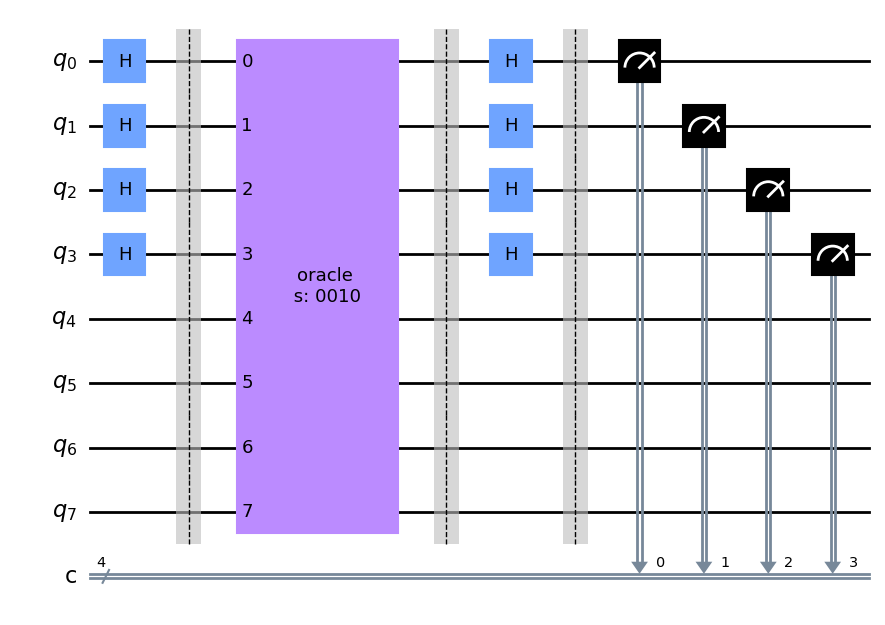

In [26]:
# Test environemnt

test_circuit = simon_circuit(number_of_qubits, s)

#draw the test circuit

test_circuit.draw('mpl')

noisless simulation time taken: 0.0027282238006591797


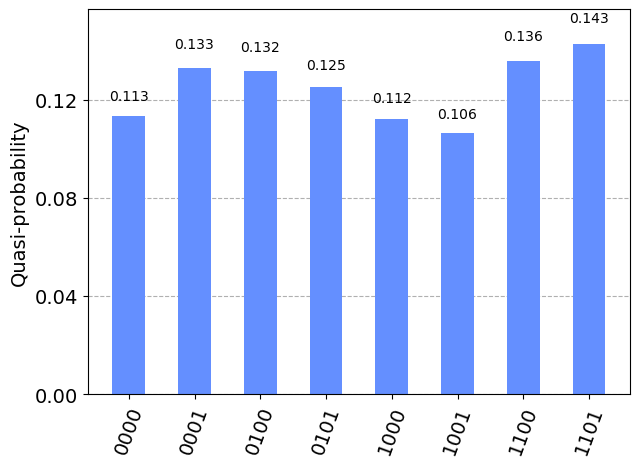

In [27]:
# noiseless simulation

#set backend
backend_sim = Aer.get_backend('qasm_simulator')
#transpile
job_sim = backend_sim.run(transpile(test_circuit, backend_sim), shots=1024)
#get result
result_sim = job_sim.result()
#get counts
counts = result_sim.get_counts(test_circuit)
#print execution time
print("noisless simulation time taken: "+ str(result_sim.time_taken))
total = sum(counts.values())
#convert count to probability
counts = {key: value / total for key, value in counts.items()}
#plot histogram
plot_histogram(counts)

Device reported a gate error parameter greater than maximum allowed value (1.000000 > 0.800000). Truncating to maximum value.
Device model returned a depolarizing error parameter greater than maximum allowed value (1.067148 > 1.066667). Truncating to maximum value.
Device reported a gate error parameter greater than maximum allowed value (1.000000 > 0.800000). Truncating to maximum value.
Device model returned a depolarizing error parameter greater than maximum allowed value (1.067183 > 1.066667). Truncating to maximum value.


noisy simulation time taken: 0.03621053695678711


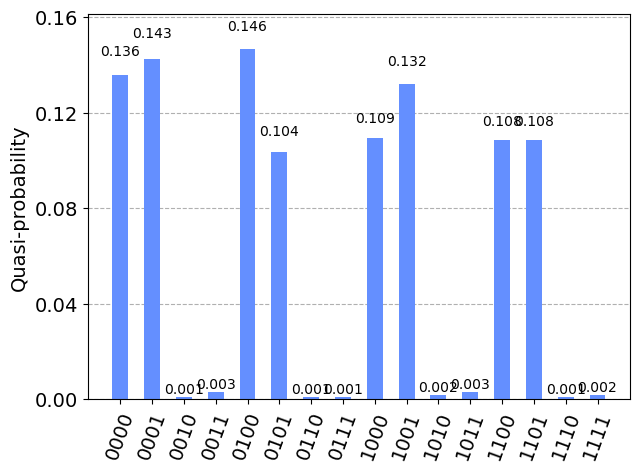

In [28]:
#noisy simulation
# set backend model with belem
noise_model = NoiseModel.from_backend(provider.get_backend('ibmq_belem'))
#define noise of basis gates
basis_gates = noise_model.basis_gates
#execute on backend
result = execute(test_circuit, Aer.get_backend('qasm_simulator'),
                 basis_gates=basis_gates,
                 noise_model=noise_model).result()

#get counts
counts = result.get_counts(0)
total = sum(counts.values())
#convert count to probability
counts = {key: value / total for key, value in counts.items()}
#print execution time
print("noisy simulation time taken: "+ str(result.time_taken))
#plot histogram
plot_histogram(counts)

noisy simulation time taken: 0.025818347930908203


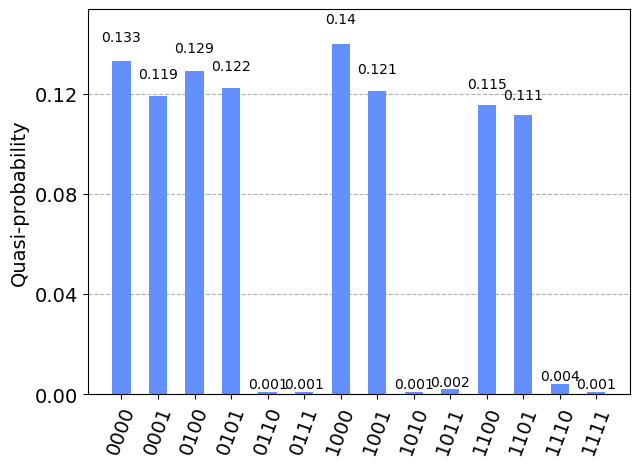

In [29]:
#noisy simulation
# set backend model with manila
noise_model = NoiseModel.from_backend(provider.get_backend('ibmq_manila'))
#define noise of basis gates
basis_gates = noise_model.basis_gates
#execute on backend
result = execute(test_circuit, Aer.get_backend('qasm_simulator'),
                 basis_gates=basis_gates,
                 noise_model=noise_model).result()

#get counts
counts = result.get_counts(0)
total = sum(counts.values())
#convert count to probability
counts = {key: value / total for key, value in counts.items()}
#print execution time
print("noisy simulation time taken: "+ str(result.time_taken))
#plot histogram
plot_histogram(counts)